In [13]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
pd.options.mode.chained_assignment = None
import statsmodels as sm
import statsmodels.api as sm1

## 0.1 Импорт

In [2]:
df = pd.read_csv("Z:/WB/DATASETS/AB_lesson4.csv", sep=',', encoding='utf-8')

In [3]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


## 0.2 Анализ Дата-фрейма на "чистоту" данных

In [4]:
ids=df['id']
df[ids.isin(ids[ids.duplicated()])].sort_values("group")

,id,group,events


Дубликатов нет

In [5]:
df[df['events']<0].count()

id        33
group     33
events    33
dtype: int64

In [6]:
df[df['events']<0]['events'].unique()

array([-3, -2, -6, -5, -1, -4, -7], dtype=int64)

Очевидно, что количество заказов не может быть отрицательным. 
Однако, на выборке в 10000 заказов в каждой группе это незначительное отклонение, тем более что значения достаточно близки к 0.

### Оставим дата-сет неизмененным

# 1. Выбор статистического теста

### Воспользуемся тестом ANOVA, так как он позволяет сравнить средние значения трех групп
- t-тест позволяет сравнить средние только 2х выборок;

- хи-квадрат нужен для измерения степени зависимости признаков, что не нужно для моей задачи;

- делать вывод **исключительно** по графику - no comments))).


**Для реализации ANOVA необходимы:**
- равенства дисперсий в группах
- нормальность распределения каждой из групп

# 2. Гипотеза

**Задача** - сравнить среднее количество заказов при разных разрешениях картинок в меню и определить какое из трех разрешений стимулирует пользователей делать в среднем больше заказов.

H0: M[A]=M[B]=M[C].

H1: хотя бы одно из равенств H0 неверно.

## 2.1 Равны ли дисперсии в выборках

In [7]:
a=np.array(df[df['group']=='A']['events'])
b=np.array(df[df['group']=='B']['events'])
c=np.array(df[df['group']=='C']['events'])

scipy.stats.levene(a,b,c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Гипотеза о равенстве дисперсий принимается

## 2.2 Нормальны ли распределения в выборках

In [8]:
scipy.stats.normaltest(a).pvalue

0.3493328906085719

In [9]:
scipy.stats.normaltest(b).pvalue

0.6566948749848232

In [10]:
scipy.stats.normaltest(c).pvalue

0.19753037588314626

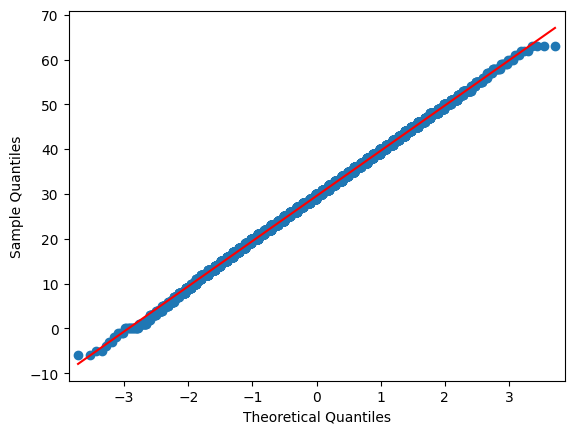

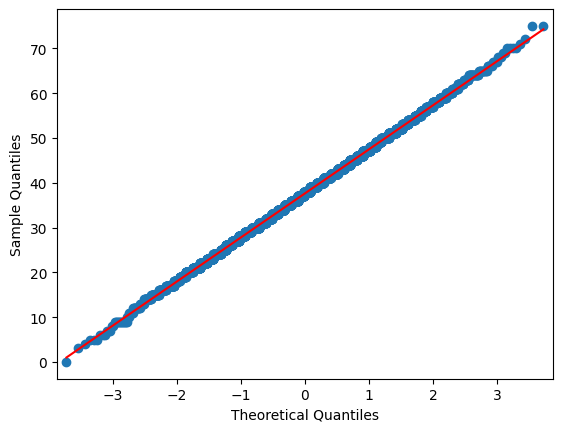

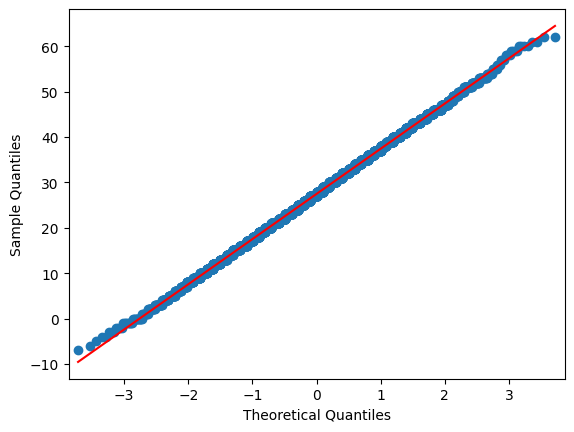

In [14]:
fig1 = sm1.qqplot(a, line = 's')
fig2 = sm1.qqplot(b, line = 's')
fig3 = sm1.qqplot(c, line = 's')
plt.show()

### Все 3 гипотезы о нормальности распределений приняты, это же подтверждает qq-plot

# 3. ANOVA

### **Односторонняя**

In [15]:
scipy.stats.f_oneway(a,b,c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

**Гипотеза о равенстве всех трех средних отвергается**

### **Двусторонняя**

In [16]:
t=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['events'],
                                        groups=df['group'],
                                        alpha= 0.05)
print(t)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [19]:
a.mean(), b.mean(), c.mean()

(29.5796, 37.6136, 27.4703)

# В результате:

Среднее количество заказов для трех групп статистически значимо отличается.
При этом, в группе В среднее количество заказов заметно выше по сравнению с остальными группами.